<h3>Flipkart Big Billion Days Customer Perspective Analysis<h3>

In [1]:
#Importing libraries and reading survey data
import pandas as pd
import numpy as np
from bioinfokit.analys import stat
df = pd.read_csv("data.csv")
df.head()

,HaveyouheardaboutTheBigBillionDays,HaveyoushoppedduringTheBigBillionDays,Agegrouprange,City,Profession,HowoftendoyoushopfromFlipkart,Satisfaction,DoyouhaveFlipkartPlusMembership,WouldyouconsiderjoiningFlipkartPlusMembership,AmazonSatisfaction,FlipkartSatisfaction,SnapdealSatisfaction,AlibabaSatisfaction,ShopcluesSatisfaction,QualityScale,PriceScale,BrandScale,ReviewScale,DiscountPercentageScale
0,Yes,No,26 - 35 years,Metro city,Working,Less Often,3,No,No,Satisfied,Neutral,Unsatisfied,Very Unsatisfied,Very Unsatisfied,3,4,2,3,4
1,Yes,Yes,26 - 35 years,Metro city,Student,Less Often,3,No,Yes,Very Satisfied,Satisfied,Very Unsatisfied,Very Unsatisfied,Very Unsatisfied,3,3,2,4,3
2,Yes,No,15 - 25 years,Metro city,Student,Quarterly,4,No,Yes,Very Satisfied,Neutral,Unsatisfied,Unsatisfied,Unsatisfied,5,5,5,5,5
3,Yes,Yes,15 - 25 years,Non-metro city/ Tier-II/ Tier-III,Student,Weekly,5,Yes,Yes,Satisfied,Satisfied,Neutral,Neutral,Neutral,5,5,5,5,4
4,Yes,Yes,15 - 25 years,Non-metro city/ Tier-II/ Tier-III,Student,Less Often,4,No,No,Neutral,Neutral,Neutral,Neutral,Neutral,1,1,1,1,1


In [2]:
#Dataset description
print(len(df)) #Number of rows (aka responses)
print(len(df.columns)) #Number of columns (aka variables)

110
19


<h3>Hypothesis Testing (Chi-Square tests)<h3>

In [3]:
#Creating crosstab
#Q1. Does age affect the customers being aware of 'The Big Billion Days' sale?
#H0: Age does not affect customers being aware of 'The Big Billion Days' sale.
#H1: Age influences customers being aware of 'The Big Billion Days' sale.
ctab = pd.crosstab(df.Agegrouprange,df.HaveyouheardaboutTheBigBillionDays) #Crosstab function tabulates two or more variables with their respective frequencies
print(ctab)
#Performing chi-square test
res = stat() #Statistical significance test 
res.chisq(ctab) #Chisquare test on ctab
print(res.summary)
#Since p < 0.05, we accept alternative hypothesis i.e age affects customers being aware of 'The Big Billion Days' sale.


HaveyouheardaboutTheBigBillionDays  No  Yes
Agegrouprange                              
15 - 25 years                        4   58
26 - 35 years                        9   27
36 - 45 years                        2    3
45+ years                            3    4

Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            3       12.0439  0.00723423
Log-likelihood     3       11.6013  0.00888147



In [4]:
#Q2. Does age influence customers shopping during 'The Big Billion Days' sale?
#H0: Age does not influence customers shopping during 'The Big Billion Days' sale.
#H1: Age influences customers shopping during 'The Big Billion Days' sale.
ctab = pd.crosstab(df.Agegrouprange,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e age does not influence customers shopping during 'The Big Billion Days' sale.

HaveyoushoppedduringTheBigBillionDays  No  Yes
Agegrouprange                                 
15 - 25 years                          22   40
26 - 35 years                          20   16
36 - 45 years                           4    1
45+ years                               3    4

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       6.37994  0.0945194
Log-likelihood     3       6.50627  0.0894156



In [5]:
#Q3. Does the customer's type of city that they live in affect their awareness of 'The Big Billion Days' sale?
#H0: Customer's type of city does not affect their awareness of 'The Big Billion Days' sale.
#H1: Customer's type of city affects their awareness of 'The Big Billion Days' sale.
ctab = pd.crosstab(df.City,df.HaveyouheardaboutTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e customer's type of city does not affect their awareness of 'The Big Billion Days' sale.

HaveyouheardaboutTheBigBillionDays  No  Yes
City                                       
Metro city                          10   58
Non-metro city/ Tier-II/ Tier-III    8   34

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.110732   0.739313
Log-likelihood     1      0.109791   0.740382



In [6]:
#Q4. Does the customer's type of city that they live in affect their shopping during 'The Big Billion Days' sale?
#H0: Customer's type of city does not affect their shopping during 'The Big Billion Days' sale.
#H1: Customer's type of city does affect their shopping during 'The Big Billion Days' sale.
ctab = pd.crosstab(df.City,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e customer's type of city does not affect their shopping during 'The Big Billion Days' sale.

HaveyoushoppedduringTheBigBillionDays  No  Yes
City                                          
Metro city                             31   37
Non-metro city/ Tier-II/ Tier-III      18   24

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1    0.00681654    0.9342
Log-likelihood     1    0.00681855    0.93419



In [7]:
#Q5. Does the customer's profession affect their awareness of 'The Big Billion Days' sale?
#H0: Customer's profession does not affect their awareness of 'The Big Billion Days' sale.
#H1: Customer's profession affects their awareness of 'The Big Billion Days' sale.
ctab = pd.crosstab(df.Profession,df.HaveyouheardaboutTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p < 0.05, we accept alternative hypothesis i.e customer's profession affects their awareness of 'The Big Billion Days' sale.

HaveyouheardaboutTheBigBillionDays  No  Yes
Profession                                 
Homemaker                            3    2
Student                              4   50
Working                             11   40

Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       11.1311  0.00382756
Log-likelihood     2        9.6133  0.00817521



In [8]:
#Q6. Does the customer's profession affect their shopping during 'The Big Billion Days' sale?
#H0: Customer's profession does not affect their shopping during 'The Big Billion Days' sale.
#H1: Customer's profession affects their shopping during 'The Big Billion Days' sale.
ctab = pd.crosstab(df.Profession,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e customer's profession does not affect their shopping during 'The Big Billion Days' sale.

HaveyoushoppedduringTheBigBillionDays  No  Yes
Profession                                    
Homemaker                               2    3
Student                                22   32
Working                                25   26

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2      0.771551   0.679923
Log-likelihood     2      0.771849   0.679822



In [9]:
#Q7. Is there any association between the customers knowing about 'The Big Billion Days' sale and the customer's frequency of shopping?
#H0: There is no association between the customers knowing about 'The Big Billion Days' sale and the customer's frequency of shopping.
#H1: There is an association between the customers knowing about 'The Big Billion Days' sale and the customer's frequency of shopping.
ctab = pd.crosstab(df.HowoftendoyoushopfromFlipkart,df.HaveyouheardaboutTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e there is no association between the customers knowing about 'The Big Billion Days' sale and the customer's frequency of shopping.

HaveyouheardaboutTheBigBillionDays  No  Yes
HowoftendoyoushopfromFlipkart              
Less Often                           8   34
Monthly                              5   26
Quarterly                            5   25
Weekly                               0    7

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       1.5939    0.660774
Log-likelihood     3       2.71705   0.437337



In [10]:
#Q8. Does customer satisfaction during the sale influence in making customers join the Flipkart Plus membership?
#H0: Customer satisfaction during the sale does not influence in making customers join the Flipkart Plus membership.
#H1: Customer satisfaction during the sale influences in making customers join the Flipkart Plus membership.
ctab = pd.crosstab(df.Satisfaction,df.WouldyouconsiderjoiningFlipkartPlusMembership)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p < 0.05, we accept alternative hypothesis i.e customer satisfaction from the products on sale during 'The Big Billion Days' influences in making customers join the Flipkart Plus membership.

WouldyouconsiderjoiningFlipkartPlusMembership  No  Yes
Satisfaction                                          
1                                               1    0
2                                               3    3
3                                               7   22
4                                              10   26
5                                               5   33

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       8.19893  0.084557
Log-likelihood     4       7.80181  0.0991139



In [11]:
#Q9. Does frequency of shopping on Flipkart influence customers from joining Flipkart Plus Membership?
#H0: Frequency of shopping on Flipkart does not influence customers from joining Flipkart Plus Membership?
#H1: Frequency of shopping on Flipkart influences customers from joining Flipkart Plus Membership?
ctab = pd.crosstab(df.HowoftendoyoushopfromFlipkart,df.WouldyouconsiderjoiningFlipkartPlusMembership)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e frequency of shopping on Flipkart does not influence customers from joining Flipkart Plus Membership.

WouldyouconsiderjoiningFlipkartPlusMembership  No  Yes
HowoftendoyoushopfromFlipkart                         
Less Often                                     13   29
Monthly                                         4   27
Quarterly                                       6   24
Weekly                                          3    4

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       4.87656   0.181063
Log-likelihood     3       4.90851   0.17862



In [12]:
#Q10. Does customer profession influence in joining Flipkart Plus Membership to get additional benefits?
#H0: Profession does not influence in joining Flipkart Plus Membership.
#H1: Profession influences in joining Flipkart Plus Membership.
ctab = pd.crosstab(df.Profession,df.WouldyouconsiderjoiningFlipkartPlusMembership)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e profession does not influence customers joining in Flipkart Plus Membership.

WouldyouconsiderjoiningFlipkartPlusMembership  No  Yes
Profession                                            
Homemaker                                       1    4
Student                                        12   42
Working                                        13   38

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2      0.193565   0.907754
Log-likelihood     2      0.194161   0.907483



In [13]:
#Q11. Does customer's satisfaction to shop on Flipkart compared to other e-commerce companies influence whether the customer has shopped during 'The Big Billion Days'?
#H0: Customer's satisfaction to shop on Flipkart does not influence whether the customer has shopped during 'The Big Billion Days'.
#H1: Customer's satisfaction to shop on Flipkart influences whether the customer has shopped during 'The Big Billion Days'.
ctab = pd.crosstab(df.FlipkartSatisfaction,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p < 0.05, we accept alternative hypothesis i.e customer's satisfaction to shop on Flipkart compared to other e-commerce companies influences whether the customer has shopped during 'The Big Billion Days'.

HaveyoushoppedduringTheBigBillionDays  No  Yes
FlipkartSatisfaction                          
Neutral                                11    5
Satisfied                              24   30
Unsatisfied                             2    3
Very Satisfied                          9   23
Very Unsatisfied                        3    0

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       11.0642  0.0258513
Log-likelihood     4       12.3596  0.0148681



In [14]:
#Q12. Does customer satisfaction with the products on sale during 'The Big Billion Days' influence customer's satisfaction to shop on Flipkart compared to other e-commerce companies?
#H0: Customer's satisfaction with the products on sale during 'The Big Billion Days' does not influence customer's satisfaction to shop on Flipkart.
#H1: Customer's satisfaction with the products on sale during 'The Big Billion Days' influences customer's satisfaction to shop on Flipkart.
ctab = pd.crosstab(df.FlipkartSatisfaction,df.Satisfaction)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p < 0.05, we accept alternative hypothesis i.e customer's satisfaction with the products on sale during 'The Big Billion Days' influences customer's satisfaction to shop on Flipkart compared to other e-commerce companies.

Satisfaction          1  2   3   4   5
FlipkartSatisfaction                  
Neutral               0  1   9   5   1
Satisfied             0  2  11  23  18
Unsatisfied           1  2   2   0   0
Very Satisfied        0  1   4   8  19
Very Unsatisfied      0  0   3   0   0

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson           16       64.7799  8.03769e-08
Log-likelihood    16       46.649   7.72291e-05



In [15]:
#Q13. Hypothesis testing
#If the customer did or did not shop during the Big Billion Days sale, does it influence their preference of choosing quality as a factor before purchasing a product during  the sale?
#H0: Customer shopping status during the Big Billion Days sale does not influence their preference of choosing quality as a factor before purchasing a product during sale.
#H1: Customer shopping status during the Big Billion Days sale does influence their preference of choosing quality as a factor before purchasing a product during sale.
ctab = pd.crosstab(df.QualityScale,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept alternative hypothesis i.e customer shopping status during the Big Billion Days sale does not influence their preference of choosing quality as a factor before purchasing a product during sale.


HaveyoushoppedduringTheBigBillionDays  No  Yes
QualityScale                                  
1                                       3    1
2                                       0    1
3                                       4   11
4                                      26   21
5                                      16   27

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       7.39141  0.116594
Log-likelihood     4       7.89645  0.0954458



In [16]:
#Q14. Hypothesis testing
#If the customer did or did not shop during the Big Billion Days sale, does it influence their preference of choosing brand as a factor before purchasing a product during  the sale?
#H0: Customer shopping status during the Big Billion Days sale does not influence their preference of choosing brand as a factor before purchasing a product during sale.
#H1: Customer shopping status during the Big Billion Days sale does influence their preference of choosing brand as a factor before purchasing a product during sale.
ctab = pd.crosstab(df.BrandScale,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e customer shopping status during the Big Billion Days sale does not influence their preference of choosing brand as a factor before purchasing a product during sale.

HaveyoushoppedduringTheBigBillionDays  No  Yes
BrandScale                                    
1                                       2    2
2                                       4    3
3                                       7   17
4                                      19   13
5                                      17   26

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       6.08153   0.193142
Log-likelihood     4       6.15753   0.187689



In [17]:
#Q15. Hypothesis testing
#If the customer did or did not shop during the Big Billion Days sale, does it influence their preference of choosing price as a factor before purchasing a product during  the sale?
#H0: Customer shopping status during the Big Billion Days sale does not influence their preference of choosing price as a factor before purchasing a product during sale.
#H1: Customer shopping status during the Big Billion Days sale does influence their preference of choosing price as a factor before purchasing a product during sale.
ctab = pd.crosstab(df.PriceScale,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e customer shopping status during the Big Billion Days sale does not influence their preference of choosing price as a factor before purchasing a product during sale.

HaveyoushoppedduringTheBigBillionDays  No  Yes
PriceScale                                    
1                                       2    1
2                                       1    1
3                                      11   12
4                                      13   25
5                                      22   22

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       2.89161   0.576125
Log-likelihood     4       2.9267    0.570166



In [18]:
#Q16. Hypothesis testing
#If the customer did or did not shop during the Big Billion Days sale, does it influence their preference of choosing reviews as a factor before purchasing a product during  the sale?
#H0: Customer shopping status during the Big Billion Days sale does not influence their preference of choosing reviews as a factor before purchasing a product during sale.
#H1: Customer shopping status during the Big Billion Days sale does influence their preference of choosing reviews as a factor before purchasing a product during sale.
ctab = pd.crosstab(df.ReviewScale,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e customer shopping status during the Big Billion Days sale does not influence their preference of choosing reviews as a factor before purchasing a product during sale.

HaveyoushoppedduringTheBigBillionDays  No  Yes
ReviewScale                                   
1                                       3    2
2                                       4    6
3                                      13    7
4                                      10   26
5                                      19   20

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       8.32676  0.0803159
Log-likelihood     4       8.51199  0.0745247



In [19]:
#Q17. Hypothesis testing
#If the customer did or did not shop during the Big Billion Days sale, does it influence their preference of choosing discount percentage as a factor before purchasing a product during  the sale?
#H0: Customer shopping status during the Big Billion Days sale does not influence their preference of choosing discount percentage as a factor before purchasing a product during sale.
#H1: Customer shopping status during the Big Billion Days sale does influence their preference of choosing discount percentage as a factor before purchasing a product during sale.
ctab = pd.crosstab(df.DiscountPercentageScale,df.HaveyoushoppedduringTheBigBillionDays)
print(ctab)
res = stat()
res.chisq(ctab)
print(res.summary)
#Since p > 0.05, we accept null hypothesis i.e customer shopping status during the Big Billion Days sale does not influence their preference of choosing discount percentage as a factor before purchasing a product during sale.

HaveyoushoppedduringTheBigBillionDays  No  Yes
DiscountPercentageScale                       
1                                       2    2
2                                       5    5
3                                      10   11
4                                      13   19
5                                      19   24

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4      0.450282   0.978157
Log-likelihood     4      0.450336   0.978152



<h3>Predictive Modelling - Logistic Regression Model</h3>

In [20]:
#Logistic Regression is used when the dependent variable(target) is categorical, hence the predicted output will be 0 or 1.
#Importing Logistic Regression model libaries and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


In [21]:
#Using Logistic Regression to determine if the customers have Flipkart Plus Membership.
#Preprocessing the data and converting categorical data to labels
df = df.replace(('Yes', 'No'), (1, 0)) #Recoding Yes and No to 0 and 1.
le = preprocessing.LabelEncoder()
df['Agegrouprange']= le.fit_transform(df['Agegrouprange'])
df['City']= le.fit_transform(df['City'])
df['HowoftendoyoushopfromFlipkart']= le.fit_transform(df['HowoftendoyoushopfromFlipkart'])
df['Profession']= le.fit_transform(df['Profession'])
df['AmazonSatisfaction']= le.fit_transform(df['AmazonSatisfaction'])
df['FlipkartSatisfaction']= le.fit_transform(df['FlipkartSatisfaction'])
df['AlibabaSatisfaction']= le.fit_transform(df['AlibabaSatisfaction'])
df['SnapdealSatisfaction']= le.fit_transform(df['SnapdealSatisfaction'])
df['ShopcluesSatisfaction']= le.fit_transform(df['ShopcluesSatisfaction'])
df['WouldyouconsiderjoiningFlipkartPlusMembership']= le.fit_transform(df['WouldyouconsiderjoiningFlipkartPlusMembership'])


In [22]:
#Independent variables
x = df[['HaveyouheardaboutTheBigBillionDays','HaveyoushoppedduringTheBigBillionDays','Agegrouprange','City','Profession','HowoftendoyoushopfromFlipkart','Satisfaction','WouldyouconsiderjoiningFlipkartPlusMembership',
'AmazonSatisfaction','FlipkartSatisfaction','SnapdealSatisfaction',	'AlibabaSatisfaction','ShopcluesSatisfaction','QualityScale','PriceScale','BrandScale','ReviewScale','DiscountPercentageScale']]
#Dependent variable
y = df['DoyouhaveFlipkartPlusMembership']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) #70% train data and 30% test data split

In [24]:
#Fitting the train and test data into the LogisticRegression predictor function
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
#Predicting if customers have shopped during 'The Big Billion Days' sale
predict = lr.predict(x_test)

In [26]:
#Creating confusion matrix for summary of prediction results on this classification problem
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes']) #Predictions against test data

,Predicted No,Predicted Yes
Actual No,16,5
Actual Yes,3,9


In [27]:
#Checking accuracy of model
print(classification_report(y_test,predict)) #F1 Score - Accuracy -> 76% accuracy


              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.64      0.75      0.69        12

    accuracy                           0.76        33
   macro avg       0.74      0.76      0.75        33
weighted avg       0.77      0.76      0.76        33



In [28]:
#Model accuracy
accuracy = accuracy_score(y_test,predict)
accuracy_percentage = "{:.0%}".format(accuracy)
print(accuracy_percentage)
#Hence, the logistic regression model to determine if customers has Flipkart Plus Membership is 76% accurate.

76%


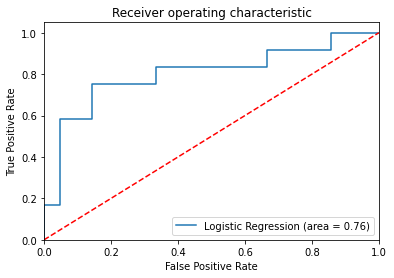

In [29]:
#ROC Curve - The dotted line represents the ROC curve of a random classifier; a good classifier stays as far away from that line as possible.
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()